<br><br>
<font size = "6">
<b>Pre-trained Models & Transfer Learning</b>
</font><br><br>

<br>
<div class="pull-right">
  Prof. Sooyoung Lee<br>
  <a href="https://iai.cau.ac.kr/" target="_blank">https://iai.cau.ac.kr/</a><br>
  Industrial AI Lab at Chung-Ang University
</div>

# 1. Pre-trained Models

## 1.1. ImageNet

- Human performance = 5.1%   



<br>
<center>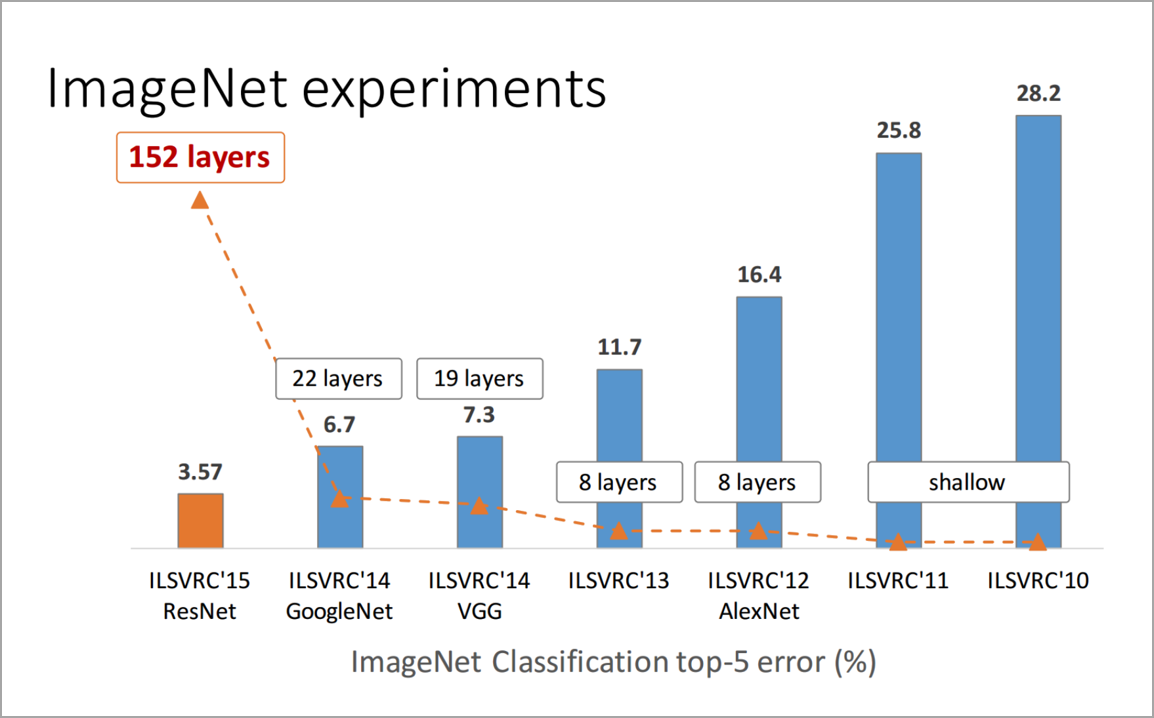</center>

<br><br>
<center>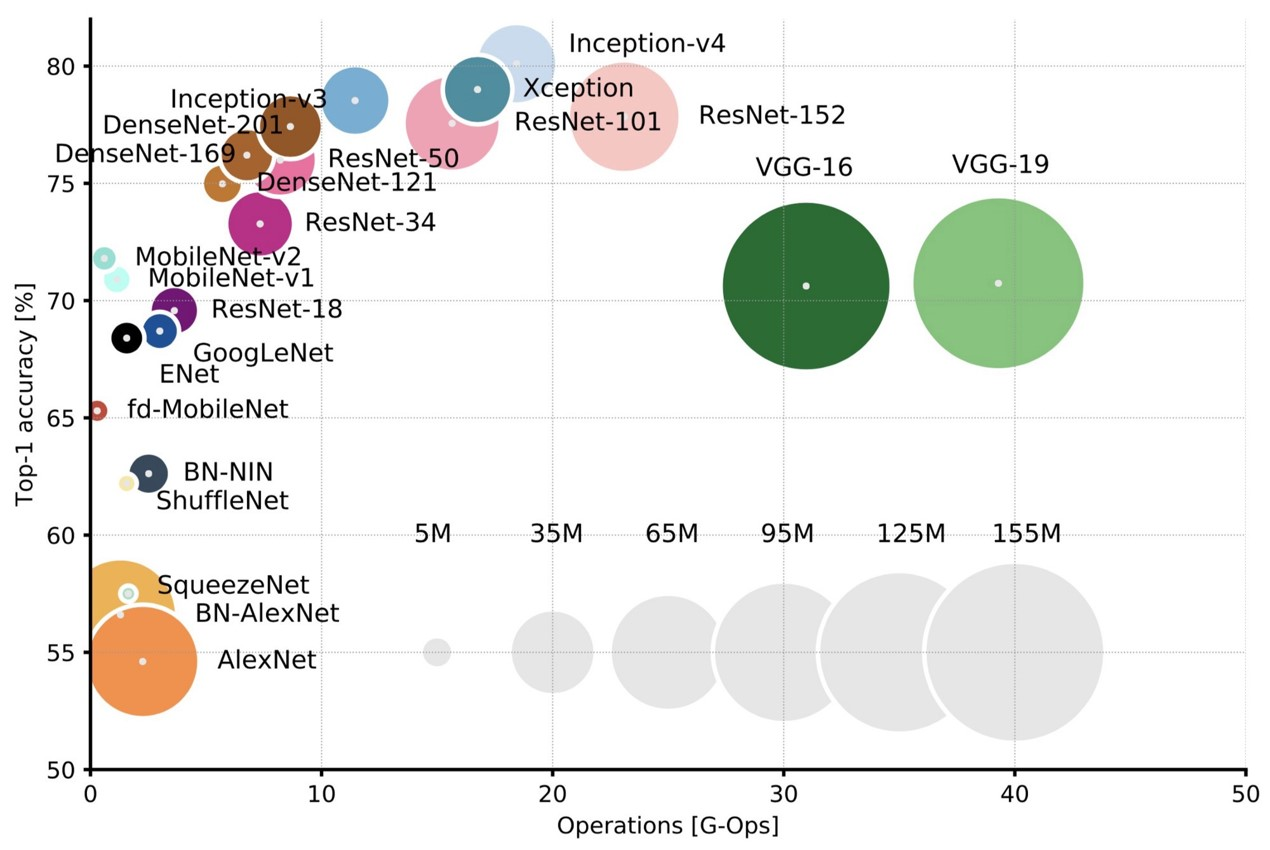</center>

## 1.2. Pre-trained CNN Models

__LeNet__

- CNN = Convolutional Neural Networks = ConvNet
- LeCun, Y., Bottou, L., Bengio, Y., and Haffner, P. (1998). Gradient-based learning applied to document recognition.
- All are still the basic components of modern ConvNets!


<br><br>
<center>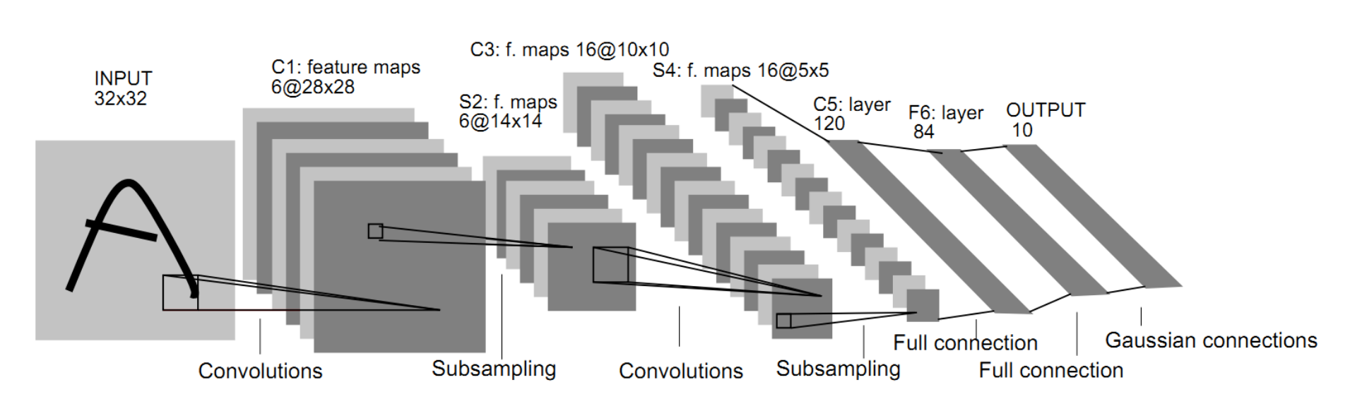</center><br><br>

__AlexNet__

- Simplified version of Krizhevsky, Alex, Sutskever, and Hinton. "Imagenet classification with deep convolutional neural networks." NIPS 2012

- LeNet-style backbone, plus:
    - ReLU [Nair & Hinton 2010]
        - RevoLUtion of deep learning
        - Accelerate training
    - Dropout [Hinton et al 2012]
        - In-network ensembling
        - Reduce overfitting
    - Data augmentation
        - Label-preserving transformation
        - Reduce overfitting




<br><br>
<center>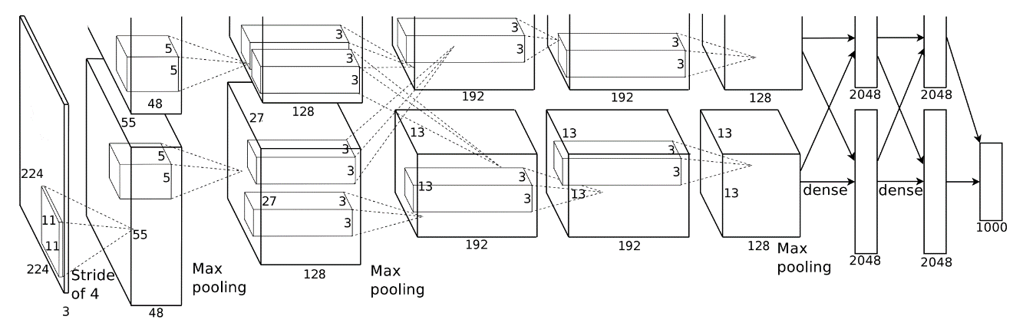</center><br><br>

__VGG-16/19__


- Simonyan, Karen, and Zisserman. "Very deep convolutional networks for large-scale image recognition." (2014)

- Simply “Very Deep”!
    - Modularized design
        - 3x3 Conv as the module
        - Stack the same module
        - Same computation for each module
    - Stage-wise training
        - VGG-11 → VGG-13 → VGG-16
        - We need a better initialization…



<br><br>
<center>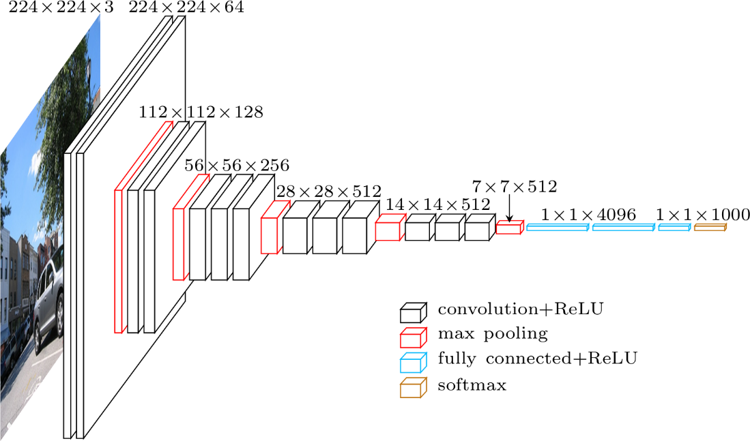</center><br><br>

__GoogleNet/Inception__

- Multiple branches
    - e.g., 1x1, 3x3, 5x5, pool
- Shortcuts
    - stand-alone 1x1, merged by concat.
- Bottleneck
    - Reduce dim by 1x1 before expensive 3x3/5x5 conv


<br><br>
<center>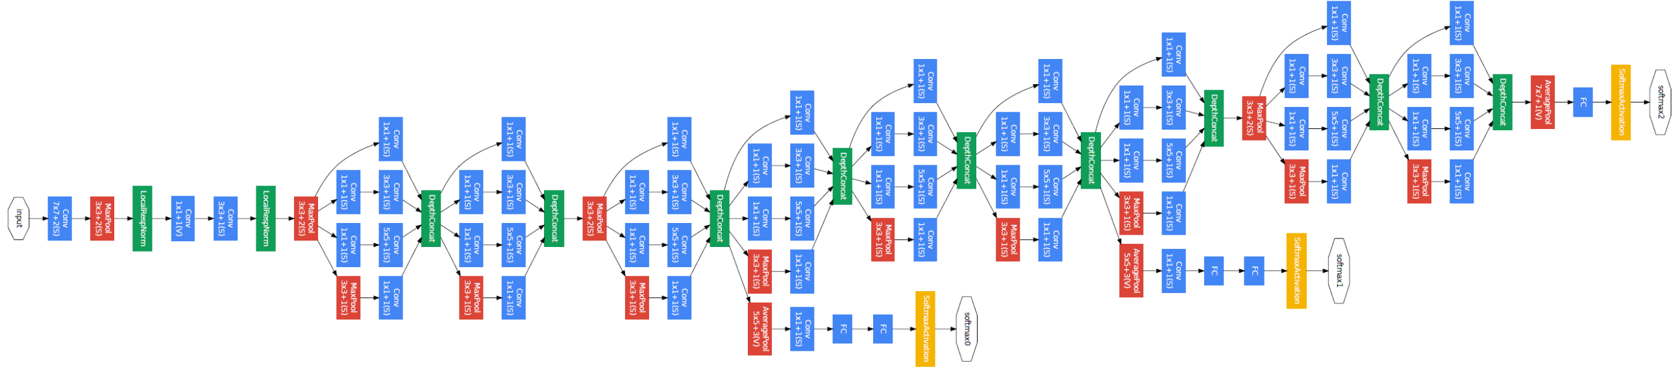</center><br><br>

__ResNet__

- He, Kaiming, et al. "Deep residual learning for image recognition." CVPR. 2016.


<br><br>
<center>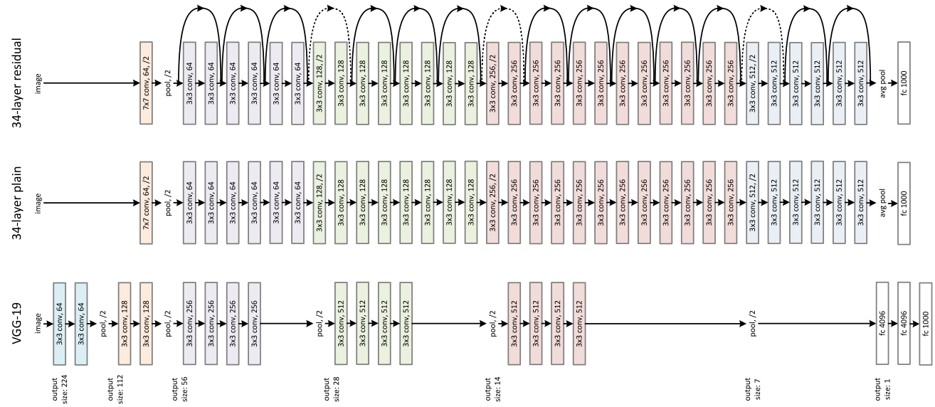</center><br><br>

- Skip Connection and Residual Net

  - A direct connection between 2 non-consecutive layers
  - No gradient vanishing

  - Parameters are optimized to learn a residual, that is the diﬀerence between the value before the block and the one needed after.

  - A skip connection is a connection that bypasses at least one layer.
  - Here, it is often used to transfer local information by concatenating or summing feature maps from the downsampling path with feature maps from the upsampling path.
  - Merging features from various resolution levels helps combining context information with spatial information.




<center>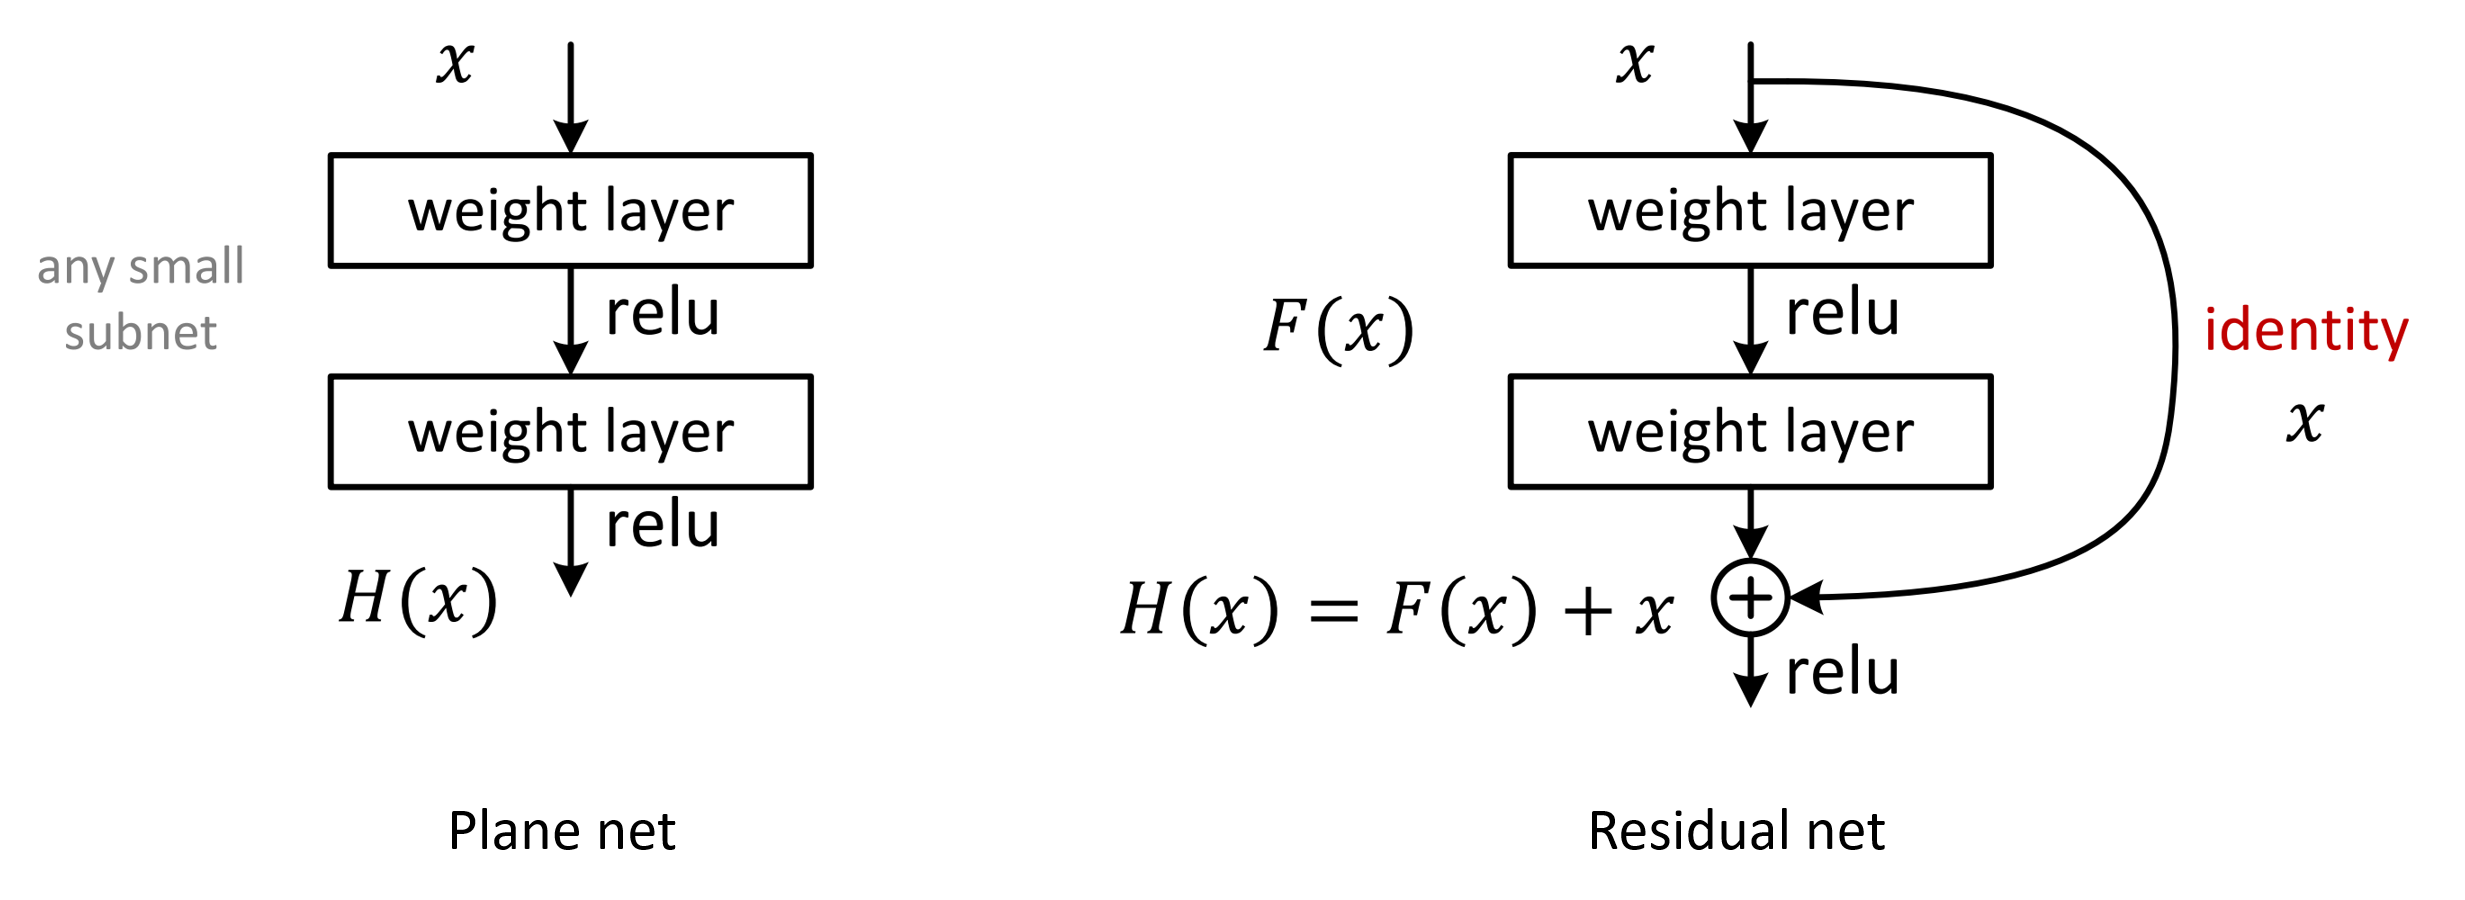</center>

``` python
class ResidualNet(nn.Module):
    def __init__(self, n_hidden, n_output):
        super(ResidualNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * 16 * 16, n_hidden)
        self.fc2 = nn.Linear(n_hidden, n_output)

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = F.relu(self.conv2(out))
        out += x  # Skip connection
        out = self.maxpool(out)
        out = self.flatten(out)
        out = F.relu(self.fc1(out))
        out = self.fc2(out)
        return out
```

__DenseNets__



<br><br>
<center>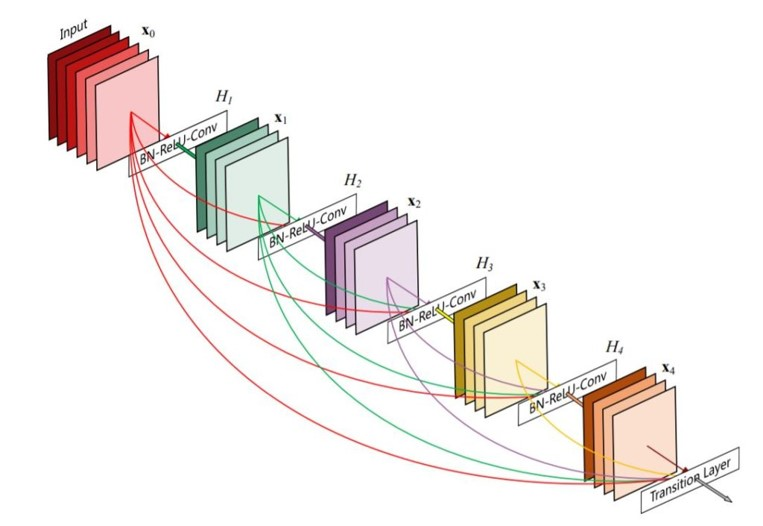</center>


__U-Net__



<br><br>
<center>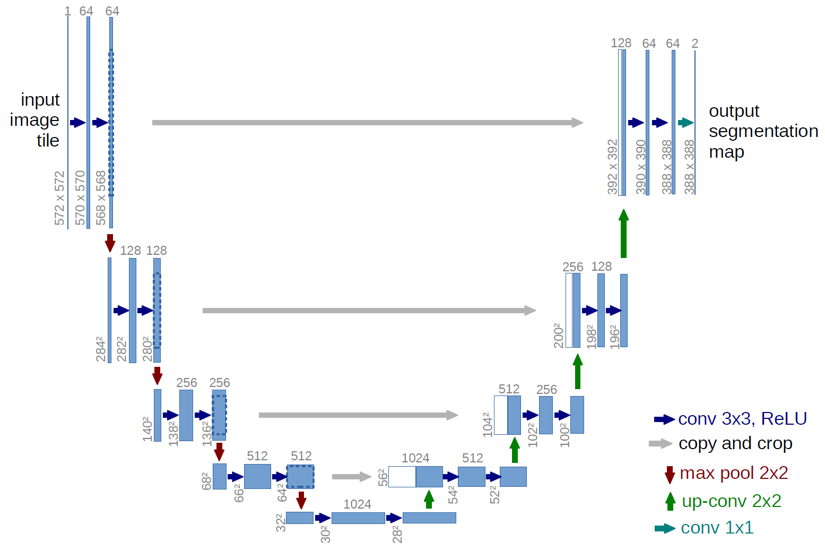</center>
<br><br>



- The U-Net owes its name to its symmetric shape

- The U-Net architecture is built upon the Fully Convolutional Network and modified in a way that it yields better segmentation in medical imaging.

- Compared to FCN-8, the two main differences are
    - U-net is symmetric and
    - the skip connections between the downsampling path and the upsampling path apply a concatenation operator instead of a sum.

- These skip connections intend to provide local information to the global information while upsampling. Because of its symmetry, the network has a large number of feature maps in the upsampling path, which allows to transfer information.


## 1.3. Load Pre-trained Models

__List of Available Models__

- VGG16
- VGG19
- ResNet
- GoogLeNet/Inception
- DenseNet
- MobileNet

In [ ]:
import matplotlib.pyplot as plt
import torch
import torchvision
import urllib.request
from torchsummary import summary
import torchvision.models as models
from PIL import Image

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


__Model Selection__

In [ ]:
# Choose the model type ## not available now (deprecated)

#model = models.densenet121(pretrained=True)
##model = models.inception_resnet_v2(pretrained=True)
#model = models.inception_v3(pretrained=True)
##model = models.mobilenet(pretrained=True)
model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.IMAGENET1K_V1)
##model = models.nasnetalarge(pretrained=True)
#model = models.resnet50(pretrained=True)
#model = models.vgg16(pretrained=True)
#model = models.vgg19(pretrained=True)


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 101MB/s]


__Model Summary__

In [ ]:
# Display model summary
summary(model.to(device), input_size = (3,224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
             ReLU6-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
             ReLU6-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             512
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 96, 112, 112]           1,536
      BatchNorm2d-11         [-1, 96, 112, 112]             192
            ReLU6-12         [-1, 96, 112, 112]               0
           Conv2d-13           [-1, 96, 56, 56]             864
      BatchNorm2d-14           [-1, 96,

__Example of Pre-trained Model__

- Download [image](https://www.dropbox.com/scl/fi/28l37mw3p2hjgdggr1cy9/soccer_image.JPEG?rlkey=360nqfg6sitkozmnef6bi6ma2&st=0ifvnx7v&dl=0)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

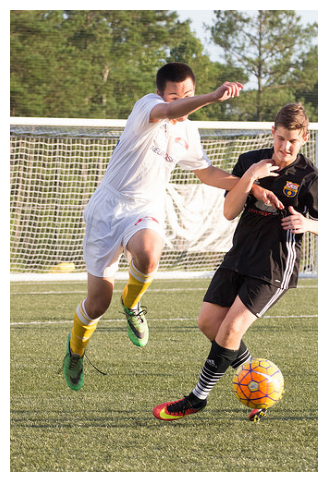

In [ ]:
img = Image.open('./soccer_image.JPEG')

plt.figure(figsize = (6, 6))
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
preprocess = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
input_tensor = preprocess(img)
input_batch = input_tensor.unsqueeze(0)

model.eval()
with torch.no_grad():
    model = model.to('cpu')
    output = model(input_batch)

LABELS_URL = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
labels = []
with urllib.request.urlopen(LABELS_URL) as f:
    labels = [line.decode('utf-8').strip() for line in f]

_, indices = torch.topk(output, 5)
percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100
predicted_classes = indices[0].tolist()

for i in range(5):
    predicted_label = labels[predicted_classes[i]]
    confidence = percentage[predicted_classes[i]].item()
    print(f'{predicted_label} ({confidence:.2f}%)\n')

soccer ball (91.70%)

baseball (2.81%)

croquet ball (2.52%)

racket (1.22%)

rugby ball (0.94%)



# 2. Transfer Learning

## 2.1. Pre-trained Model (VGG16)

- Training a model on ImageNet from scratch takes days or weeks.
- Many models trained on ImageNet and their weights are publicly available!


- Transfer learning
    - Use pre-trained weights, remove last layers to compute representations of images
    - The network is used as a generic feature extractor
    - Train a classification model from these features on a new classification task
    - Pre- trained models can extract more general image features that can help identify edges, textures, shapes, and object composition
    - Better than handcrafted feature extraction on natural images




<br><br>
<center>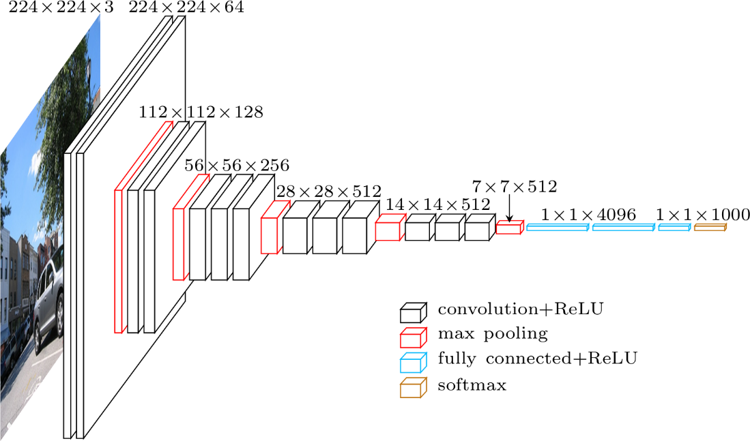</center>
<br><br>

<br>
<center>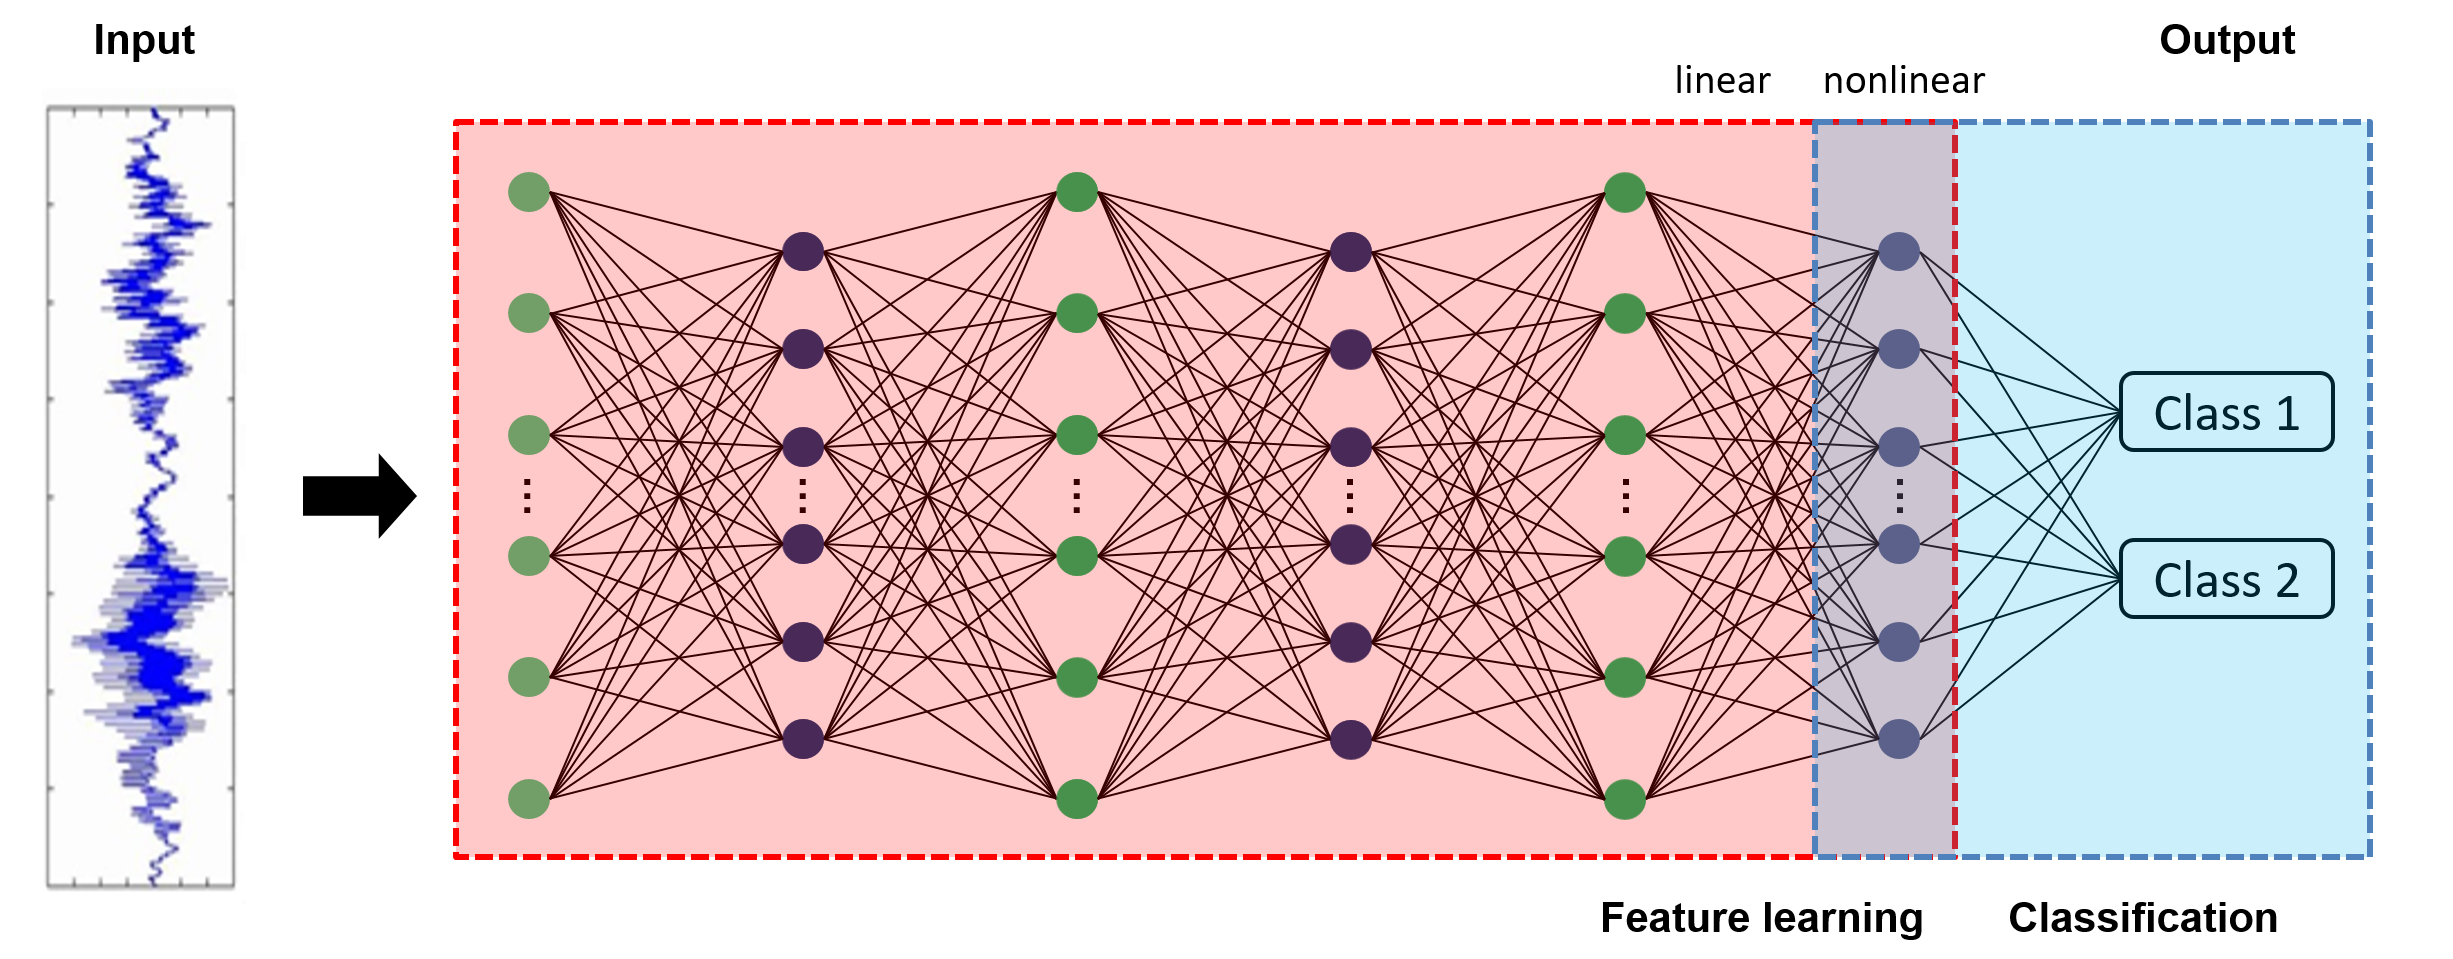</center>


__Import Library__

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
from torchsummary import summary
import torchvision.models as models
from torch.utils.data import DataLoader, TensorDataset

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


__Load Data__

Download data files
- [tranfer_learning_train_images](https://www.dropbox.com/scl/fi/nb9y8rcb6bzew66pidt04/tranfer_learning_train_images.npy?rlkey=nsk69kihvm1xhtr8doxcp6p80&st=lod4hwbi&dl=0)
- [tranfer_learning_train_labels](https://www.dropbox.com/scl/fi/4l1ouaysc65zi83j2fp5f/tranfer_learning_train_labels.npy?rlkey=ujlhhhjy5ws80xuzj1txabrq3&st=y4o7e84d&dl=0)
- [tranfer_learning_test_images](https://www.dropbox.com/scl/fi/6q2zxgkbyk653qsyxishc/tranfer_learning_test_images.npy?rlkey=nwrh2iowpvbunm9wcchutfgp7&st=zdob1cmw&dl=0)
- [tranfer_learning_test_labels](https://www.dropbox.com/scl/fi/v6cwd3hpkucpcet7xgfne/tranfer_learning_test_labels.npy?rlkey=dznp4msoee7yb1u4kwoxaovzc&st=58m1tyhm&dl=0)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Change file paths if necessary

train_imgs = np.load('./tranfer_learning_train_images.npy')
train_labels = np.load('./tranfer_learning_train_labels.npy')

test_imgs = np.load('./tranfer_learning_test_images.npy')
test_labels = np.load('./tranfer_learning_test_labels.npy')

print(train_imgs.shape)
print(train_labels[0]) # one-hot-encoded 5 classes

# remove one-hot-encoding
train_labels = np.argmax(train_labels, axis = 1)
test_labels = np.argmax(test_labels, axis = 1)

(65, 224, 224, 3)
[1. 0. 0. 0. 0.]


In [ ]:
n_train = train_imgs.shape[0]
n_test = test_imgs.shape[0]

# very small dataset
print(n_train)
print(n_test)

65
9


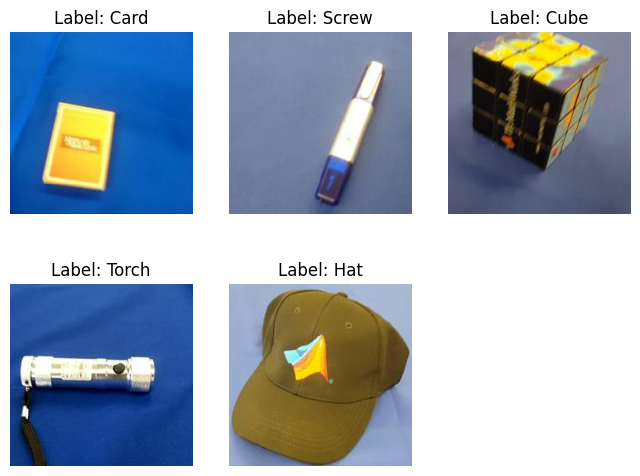

In [ ]:
Dict = ['Hat','Cube','Card','Torch','Screw']

plt.figure(figsize = (8, 6))
plt.subplot(2,3,1)
plt.imshow(train_imgs[1])
plt.title("Label: {}".format(Dict[train_labels[1]]))
plt.axis('off')
plt.subplot(2,3,2)
plt.imshow(train_imgs[2])
plt.title("Label: {}".format(Dict[train_labels[2]]))
plt.axis('off')
plt.subplot(2,3,3)
plt.imshow(train_imgs[3])
plt.title("Label: {}".format(Dict[train_labels[3]]))
plt.axis('off')
plt.subplot(2,3,4)
plt.imshow(train_imgs[18])
plt.title("Label: {}".format(Dict[train_labels[18]]))
plt.axis('off')
plt.subplot(2,3,5)
plt.imshow(train_imgs[25])
plt.title("Label: {}".format(Dict[train_labels[25]]))
plt.axis('off')
plt.show()

__Load VGG16 Model__



<br><br>
<center>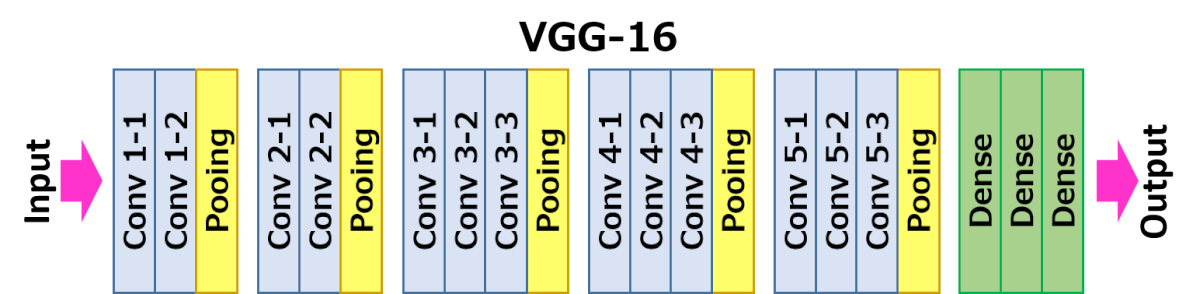</center>
<br><br>

In [ ]:
base_model = models.vgg16(pretrained=False)
base_model = base_model.to(device)
summary(base_model, (3, 224, 224))
# 3x3 convolution

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

## 2.2. Transfer Learning

- We assume that these model parameters contain the knowledge learned from the source data set and that this knowledge will be equally applicable to the target data set.
- We will train the output layer from scratch, while the parameters of all remaining layers are fine tuned based on the parameters of the source model.
- Or initialize all weights from pre-trained model, then train them with target data



<br><br>
<center>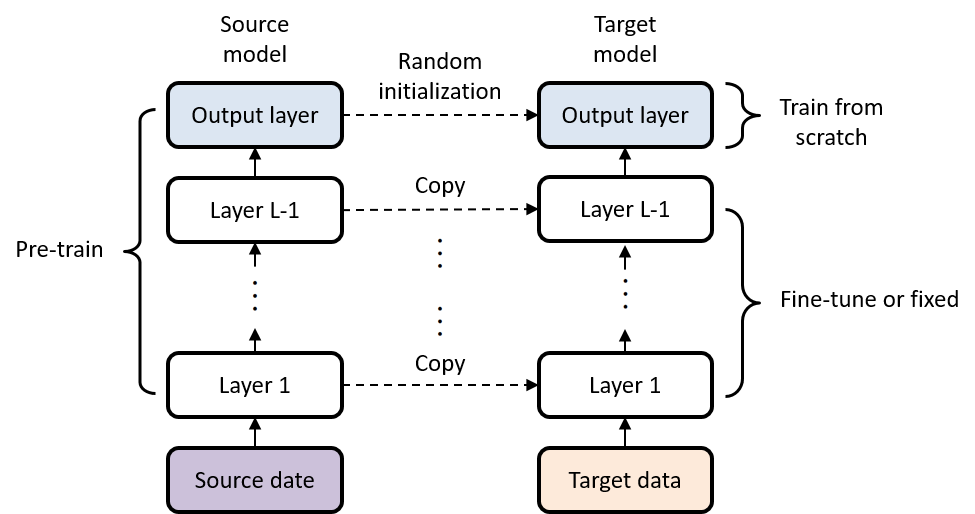</center>
<br><br>


<br><br>
<center>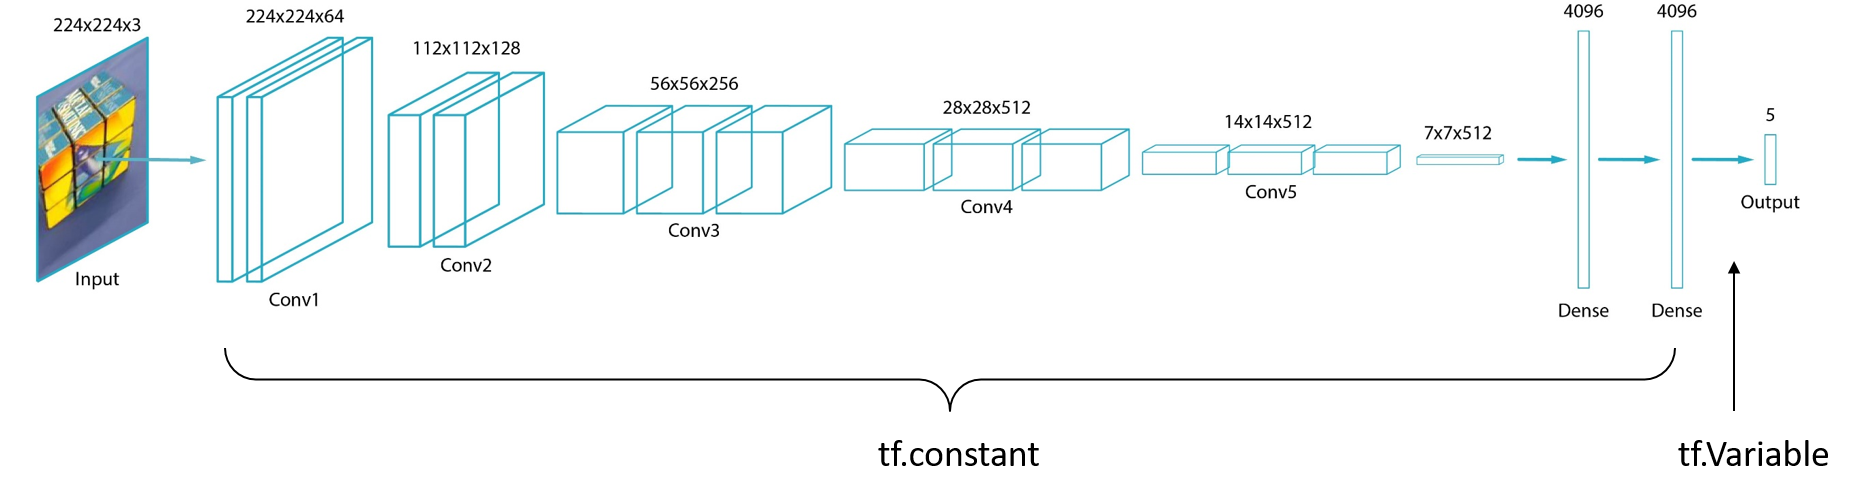</center>
<br><br>


__Pre-trained Weights, Biases__

In [ ]:
model = models.vgg16(pretrained=True) # pre-trained 된 data를 가져오는것임
model = model.to(device)
summary(model, (3, 224, 224))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:08<00:00, 67.7MB/s]


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

__Build a Transfer Learning Model__

In [ ]:
# replace new and trainable classifier layer
num_features = model.classifier[6].in_features
model.classifier[6] = nn.Sequential(
    nn.Linear(num_features, len(Dict)),
)
model = model.to(device)
summary(model, (3, 224, 224))
# 1000개 짜리 모델을 5개짜리로 바꾸는것
# 새로운 학습해야하는 parameter가 생겨난것이고
# 연결되어있는 20,485개만 학습하면됨.

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [ ]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToPILImage(),
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
train_imgs_tensor = torch.stack([transform(img) for img in train_imgs])
train_labels_tensor = torch.tensor(train_labels).long()
test_imgs_tensor = torch.stack([transform(img) for img in test_imgs])
test_labels_tensor = torch.tensor(test_labels).long()

train_dataset = TensorDataset(train_imgs_tensor, train_labels_tensor) # TensorDataset에 데이터를 load
test_dataset = TensorDataset(test_imgs_tensor, test_labels_tensor)

train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)


__Define Loss and Optimizer__

In [ ]:
model.train()

criterion = nn.CrossEntropyLoss() # 모델을 분류
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4) # Adam모델로 학습

__Optimize__

In [ ]:
num_epochs = 10

model.to(device)
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(images) # 예측값
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    if epoch % 1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4e}')

print('Training finished.')

Epoch [1/10], Loss: 1.0455e+00
Epoch [2/10], Loss: 7.4521e-02
Epoch [3/10], Loss: 3.1538e-02
Epoch [4/10], Loss: 6.5203e-02
Epoch [5/10], Loss: 4.7710e-02
Epoch [6/10], Loss: 2.4442e-04
Epoch [7/10], Loss: 2.4658e-03
Epoch [8/10], Loss: 5.6428e-03
Epoch [9/10], Loss: 6.5543e-02
Epoch [10/10], Loss: 2.2178e-03
Training finished.


__Test and Evaluate__

In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    model.to('cpu')
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the model on the test images: {100 * correct / total:.2f}%')
# test된 data에 대해서는 Accuracy가 100%가 나오는것임

Accuracy of the model on the test images: 100.00%


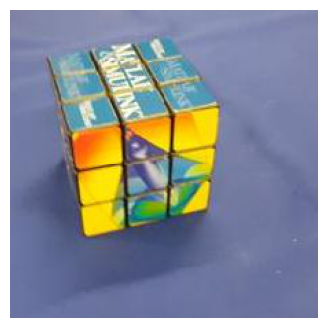

Prediction : Cube


In [ ]:
idx = np.random.choice(n_test, 1)[0]
test_x = test_imgs[idx]

test_x_tensor = transform(test_x).unsqueeze(0)

model.eval()
with torch.no_grad():
    model.to('cpu')
    output = model(test_x_tensor)
    _, pred = torch.max(output, 1)

plt.figure(figsize = (4, 4))
plt.imshow(test_x)
plt.axis('off')
plt.show()

print('Prediction : {}'.format(Dict[pred]))